# Date exploration

In this sheet I have taken a look at the dataset provided to try and make some educated guesses on what model to use as well as how to initiate and train my model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
dataTrain = pd.read_csv("data/challenge1_train.csv")
dataTest = pd.read_csv("data/challenge1_test.csv")

## The Data

First of all the data is imported and plotted to double check the integrity of the import.

In [3]:
dataTrain.head()

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,I,AU,134e98eb8,be42001f3,6.8928,B,0.0,R,...,3.0,be0264098,3.0,0.0,B,N,51.0,1d2ee04de,m,1.0
1,1,1,N,NaN,232792002,3aad93cab,6.8098,A,1.0,G,...,1.0,71fb03996,3.0,1.0,F,N,10.0,e06abf51f,k,1.0
2,2,0,P,JP,64e2a3589,90116a97d,6.7761,A,0.0,R,...,2.0,bf987f83f,3.0,0.0,C,S,16.0,5d1ac7760,c,0.0
3,3,0,K,IT,960cdb2ef,dc4ee566b,6.9302,A,0.0,R,...,3.0,d40fcead7,2.0,0.0,D,N,63.0,b0ab8b134,i,1.0
4,4,0,H,AU,8377590c9,f09cc205f,7.0238,A,1.0,G,...,6.0,NaN,2.0,1.0,A,S,26.0,0764632bc,h,1.0


## Numerical values

Simple statistics of the dataset is shown. Most notable is the following:

* target mean = 0.187. This tells us that there are a lot more 0 than 1 in the dataset, and could be reasuring when looking at raw predictions later on, seeing the same pattern

* min value >= 0. We have a lower bound on the data being 0. Using this we can define a uniused category in the model by using -1 as it is not pressent in the dataset.

* A lot of the variables has a low max value, telling us we should examin the unique element count of the variables. Having only int values from e.g. 1-6 could indicate a numerical coding of categorical values.

In [4]:
dataTrain.describe()

,id,target,f4,f6,f8,f10,f16,f17,f19,f21,f22,f25,f28
count,50000.000000,50000.00000,48594.000000,48457.000000,48522.000000,48492.000000,48488.000000,48545.000000,48447.000000,48510.000000,48497.000000,48501.000000,48535.000000
mean,24999.500000,0.18728,6.988378,0.536847,4.112032,1.721665,6.362399,0.409113,4.120689,1.947784,0.628328,62.147378,0.537406
std,14433.901067,0.39014,0.152945,0.656913,1.851792,3.427500,3.455422,0.185697,2.034561,0.852700,0.483257,33.086578,0.498604
min,0.000000,0.00000,6.521800,0.000000,1.000000,0.000000,1.000000,0.100000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,12499.750000,0.00000,6.870225,0.000000,3.000000,0.000000,3.000000,0.200000,2.000000,1.000000,0.000000,32.000000,0.000000
50%,24999.500000,0.00000,6.987500,0.000000,5.000000,0.000000,6.000000,0.500000,5.000000,2.000000,1.000000,65.000000,1.000000
75%,37499.250000,0.00000,7.102300,1.000000,6.000000,1.000000,8.000000,0.600000,6.000000,3.000000,1.000000,94.000000,1.000000
max,49999.000000,1.00000,7.479400,2.000000,6.000000,11.000000,12.000000,0.600000,7.000000,3.000000,1.000000,104.000000,1.000000


----

## Variable count and uniqueness

Having learned that most numerical values has a relatively low max value it might be interesting to see the variation of variables in the trainingset as well as what new variables are introduced by the testset.

To studdy this a count of the following are made:
* The number of unique variables in the train set
* The number of unique variables in both the train and test set *combined*
* The increase in unique variables when adding the test set to the train set

*The findings are discussed under the plot*

In [5]:
dataTrain = dataTrain.fillna(-1)  # Add -1 as indicator value for NaN values
dataTest = dataTest.fillna(-1)
hexCols = ["f2", "f3", "f13", "f18", "f20", "f26"]
numCols = ["id", "target", "f4", "f6", "f8", "f10", "f16", "f17", "f19", "f21", "f22", "f25", "f28"]
charCols = ["f0", "f1", "f5", "f7", "f9", "f11", "f12", "f14", "f15", "f23", "f24", "f27"]
cols = dataTrain.columns

displayCols = []
displayThreshold = 30
print("Number of unique values within a variable:\n")
print(f'{"Var Name":8} | {"Type":4} | {"Test set":8} | {"Both sets":>9} | {"Increase":>8}')
for col in cols:  # Use sets to count unique values.
    trainSet = set(dataTrain[col])
    if -1 in trainSet:
        trainSet.remove(-1)  # Reomve NaN values if they exist
    count = len(trainSet)
    if col != "target":
        testSet = set(dataTest[col])
        if -1 in testSet:
            testSet.remove(-1)
        countBoth = len(testSet.union(trainSet))
        increase = str(round((countBoth-count)/count *100 , 1)) + " %"
    else:
        countBoth = "---"
        increase = "---"
    if count <= displayThreshold:
        displayCols.append(col)
    typ = ""
    if col in hexCols:
        typ = "hex"
    elif col in numCols:
        typ = "num"
    elif col in charCols:
        typ = "char"
    print(f'{col:8} | {typ:4} | {count:>8} | {countBoth:>9} | {increase:>8}')

Number of unique values within a variable:

Var Name | Type | Test set | Both sets | Increase
id       | num  |    50000 |    100000 |  100.0 %
target   | num  |        2 |       --- |      ---
f0       | char |       26 |        26 |    0.0 %
f1       | char |        5 |         5 |    0.0 %
f2       | hex  |     1499 |      1512 |    0.9 %
f3       | hex  |     1206 |      1215 |    0.7 %
f4       | num  |     7023 |      7529 |    7.2 %
f5       | char |        2 |         2 |    0.0 %
f6       | num  |        3 |         3 |    0.0 %
f7       | char |        3 |         3 |    0.0 %
f8       | num  |        6 |         6 |    0.0 %
f9       | char |      190 |       190 |    0.0 %
f10      | num  |        4 |         4 |    0.0 %
f11      | char |      190 |       190 |    0.0 %
f12      | char |        6 |         6 |    0.0 %
f13      | hex  |      222 |       222 |    0.0 %
f14      | char |        2 |         2 |    0.0 %
f15      | char |       26 |        26 |    0.0 %
f16   

## Unique value findings 

Looking at the plott we see that most variables, has a fairly limited number of unique variables, given that the number of rows in the dataset is 50,000.

The outliers here are f2, f3, f4 and f20. All four of theese variables has a increase in the numbre of unique variables. Simultaionsly they are also the only four variables with a count higher that 222.

Looking at the scale of the hex variables possible space (9 ciphers resulting in 6.87e+10 possible unique values) one could argue that the slight increase (>= 1.5%) in unique variables and the relatively low amount of unique variables whould suggest that the hex variables are a hashing for another type of variable in order to disguise the variable and in turn nature of the dataset. 

Further more this sugest that the numerical value of the hex variables does not have a meaningful (e.g. linear) relation to the target value as the hash would have scrabled the relation. Despite of theese findings a attempt to train the model using the numerical values was made, but this resulted in poor results.

The highest increase in number of unique values, as well as being the varible with the most unique variable is f4. This variable is a double with a value in the space (6.521800, 7.479400). More about this variable under the correlation matrix

----
## Correlation matrix for decimal values of hex variables

It was earlier discussed how the hex values might be a hash of the original variables (e.g. names, movietitles, cities, contries, symptoms) to hide the variable and the nature of the dataset. This would result in a not so visible correlation between the numerical value of the hexadecimal strings and the target.

When we convert the hexadecimal values to decimals and plott them in a correlation matrix the result further strengthens that belief as none of the hex variables has a hig correlation to the target.

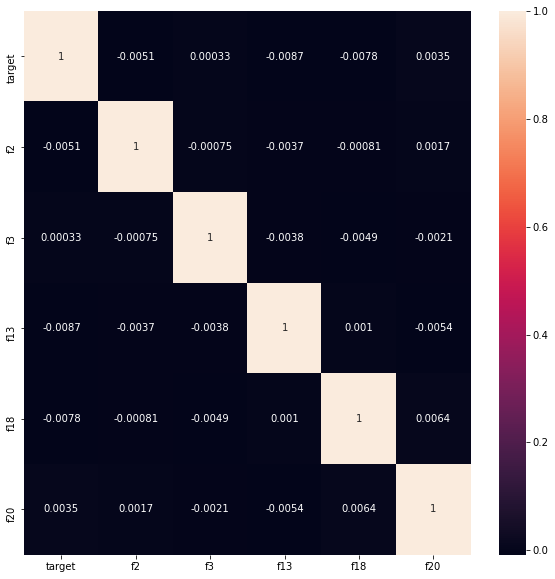

In [6]:
hexCols = ["f2", "f3", "f13", "f18", "f20"]
hexConverted = {"target": dataTrain["target"].values}

for col in hexCols:
    hexConverted[col] = []
    for i, item in enumerate(dataTrain[col]):
        if "E+" in str(item):
            item = int(float(str(item)))
        hexConverted[col].append(int(str(item), 16))
corrDF = pd.DataFrame(hexConverted)
hexCorr = corrDF.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(hexCorr, annot=True,  ax=ax);

## Hex distributions

Further more one can see a fairly equal distribution of the hexadecimal values, again indicating that the hash has made the values pseudorandom, indicating that a categorical aproach should be investigated.

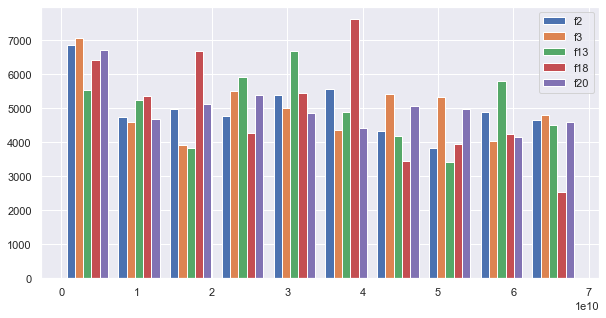

In [21]:
hexPlotList = []
for col in hexCols:
    hexPlotList.append(corrDF[col])
plt.figure(figsize=(10,5))
plt.hist(hexPlotList, histtype='bar')
plt.legend(hexCols)
plt.show();

----
## Correlation matrix for numerical values

First we can start by talking about variable f4, which we saw was a numerical variable with the most unique variables even though it only spanned from (6.521800, 7.479400). As seen in the correlation matrix the variable does not correlate well with the target (with a correlation coefficient = -0.0016), and it is hard to make an informed descision on how to handle the variable. For this task the variable was left as a continous numerical value, as categorical values must be integers in CatBoost.

Other variables which might be interesting to keep in mind in this task is f16 and f21, the two variables with the highest correlation coefficient in relation to the target. What might be interesting here is the fact that f16 has 12 unique values and f14 has 3. Early on in this process one might be tempted to say that at leasts f14 should be treated as a categorical feature as the low, discrete number of unique values might be a pointer to features and not values, but the pressence of a, though it might be somewhat weak, correlation sugests that atleast some experementation with using bouth is in order.

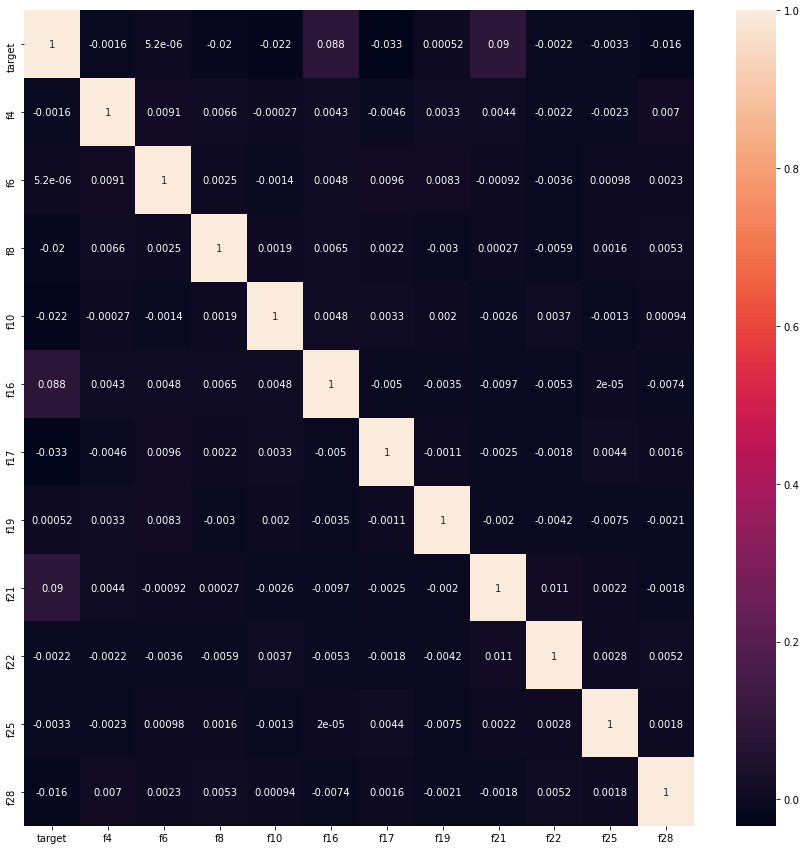

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataTrain[cols[1:]].corr(), annot=True,  ax=ax);

The two variables with the highest correlation to the target is plotted under, but keep in mind -1 is a placeholder for NaN values/"missing" data.

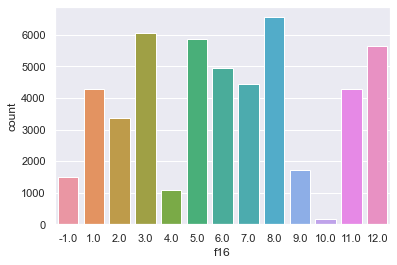

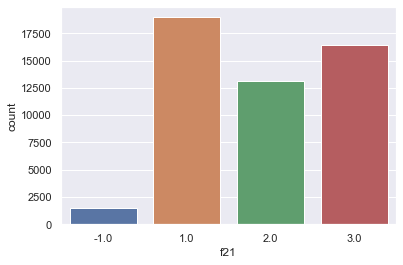

In [9]:
displayCols = ["f16", "f21"]

for col in displayCols:
    sns.set(style="darkgrid")
    ax = sns.countplot(x=col, data=dataTrain)
    plt.show()

## Conclution

Having looked at the data it is hard to conclude anything concrete, though some pointers are given before continuing with training a model.

When thinking about what model to use a good choice coud be using a CatBoostClassifier, as the model is made to handle categorical datasets and without having found a clear correlation pattern a decision tree approach might be a good idea. By using CatBoost with the numerical knowledge one can